In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
def read_and_process_file(file_path):
    result_list = []

    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

            # Extract every second line
            for i in range(1, len(lines), 2):
                line = lines[i].strip()

                # Split the line into a list of integers
                integer_series = list(map(int, line.split()))

                result_list.append(integer_series)

        return result_list

    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None
    except Exception as e:
        print("An error occurred:", e)
        return None

def create_csv_from_2d_list(values, loc_ids, file_name="brownfields_top20_output.csv"):
    # Sum each column of the 2D list
    column_sums = [sum(col) for col in zip(*values)]
    # Create a DataFrame with indices and summed column values
    df = pd.DataFrame({
        'loc_ids': loc_ids,
        'obs_rate': column_sums})
    df_sorted = df.sort_values(by=df.columns[1], ascending=False)
    # Save the DataFrame to a CSV file in the same directory
    df_sorted.to_csv(file_name, index=False)

def normalize_history(history):
    for line in history:
        sum=0
        for element in line:
            sum=sum+element[1]
        for element in line:
            element[1]=element[1]/sum

def get_history_indices_list(history):
    index_list=[]
    for line in history:
        for element in line:
            if element[0] not in index_list:
                index_list.append(element[0])
    return index_list

def normalize_read_list(list):
    line_counter=0
    for line in list:
        sum=0
        for element in line:
            sum=sum+element
        element_counter=0
        for element in line:
            list[line_counter][element_counter]=element/sum
            element_counter+=1
        line_counter+=1

In [29]:
loc_ids = np.array([i for i in range(0,265)])

In [30]:
master_distrib=[0]*266 # num locs + 1, CAREFUL, this list starts from index 1 TO PLOT the right location indices. The exported location indices also start from 1. 
# The data for brownfield indices start from 0. After exporting the best indices, subtract 1 from them while accessing to brownfield data. 
file_name="recorder.txt"
read_list=read_and_process_file(file_name)
history=[]

# Get the resulting list, normalize it inside each combination length, sum them for each location and get the indices of top n observation rates.
normalize_read_list(read_list)
np_read_list=np.array(read_list)
column_sums = np.sum(np_read_list, axis=0)
indexed_column_sums=[]
for i in range(len(column_sums)):
    indexed_column_sums.append([column_sums[i],i])
np_indexed_column_sums=np.array(indexed_column_sums)
sorted_column_sums = np_indexed_column_sums[np_indexed_column_sums[:, 0].argsort()[::-1]]

trimmed_sums = sorted_column_sums[:20] 

# Get the results of 20 observed locations
index_list=[x[1] for x in trimmed_sums]
index_list=sorted(index_list)
index_list=[int(x) for x in index_list]
included_history=[]
for line in read_list:
    included_line=[]
    for i in range(len(line)):
        if i in index_list:
            included_line.append(line[i])
    included_history.append(included_line)

np_amplitudes=np.array(included_history)

id_prints=[]
for index in index_list:
    id_prints.append(loc_ids[index])

create_csv_from_2d_list(included_history,id_prints,file_name="loc_id_vs_obs_rate.csv")

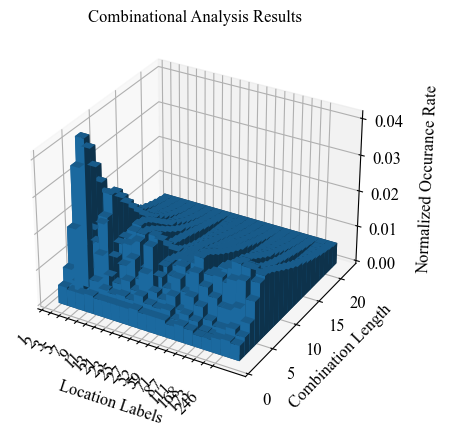

In [31]:
np_amplitudes=np.array(included_history)

x = np.arange(1, 21)  # 1 to 20
y = np.arange(1, 22)  # 1 to 21
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Flatten the meshgrid arrays to use as coordinates for the bars
x = x.flatten()
y = y.flatten()
z = np.zeros_like(x)  # Z-coordinate for the bottom of the bars

# Set the height of the bars using the data values
dx = dy = 1  # Width and depth of the bars
dz = np_amplitudes.flatten()

# Create 3D bars
plt.rcParams['font.family'] = ['Times New Roman']
ax.bar3d(x, y, z, dx, dy, dz, shade=True)

figfont = {'fontname':'Times New Roman'}
plt.xticks(fontname = "Times New Roman",fontsize=12)
plt.yticks(fontname = "Times New Roman",fontsize=12)
ax.set_xlabel('Location Labels',figfont,fontsize=12,labelpad=10)
ax.set_ylabel('Combination Length',figfont,fontsize=12)
ax.set_zlabel('Normalized Occurance Rate',figfont,fontsize=12,labelpad=10)
ax.set_title('Combinational Analysis Results',figfont,fontsize=12)
for t in ax.zaxis.get_major_ticks(): t.label.set_font('Times New Roman')
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(12)

str_indices=[str(x) for x in index_list]
x_list=[i for i in range(20)]

plt.xticks(x_list,str_indices,rotation=45, ha='right')
plt.show()

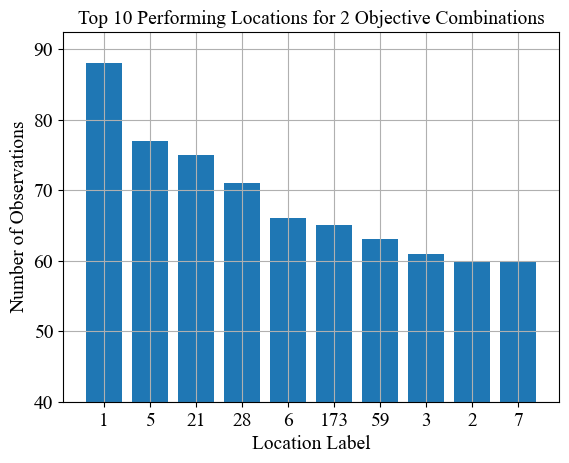

In [32]:
# 2 Combination list from the recorder.txt file
numbers = [0,88,60,61,55,77,66,60,55,56,55,60,37,56,46,48,55,42,58,56,36,75,57,59,46,56,55,60,71,56,40,57,32,39,55,45,55,49,31,55,46,58,58,45,45,47,45,45,45,45,45,45,40,38,45,45,45,60,29,63,46,46,37,47,36,36,36,36,36,45,36,53,36,36,36,37,30,36,36,45,36,37,46,37,36,36,38,33,36,45,45,45,36,38,32,36,37,45,45,36,36,36,37,37,21,37,37,45,45,36,45,30,28,37,36,36,45,36,36,36,36,33,37,36,36,36,28,36,15,28,28,46,36,36,36,36,28,28,37,45,45,41,28,29,28,29,28,36,28,34,39,36,36,36,36,28,36,36,36,45,28,36,28,28,45,29,30,28,56,40,28,36,36,65,28,36,36,36,28,40,28,30,29,28,28,28,28,21,28,28,28,28,28,22,28,28,37,29,28,36,15,28,36,28,28,36,28,21,28,28,28,28,28,28,28,28,28,21,22,28,36,28,31,28,28,37,21,21,28,28,57,21,38,57,57,21,28,21,28,47,22,49,38,28,28,41,51,21,16,21,21,39,21,22,10,30,38,15,38,21,30,32,30,34,31,23]

# Get the indices and values of the top 10 numbers
top_indices = sorted(range(len(numbers)), key=lambda i: numbers[i], reverse=True)[:10]
top_values = [numbers[i] for i in top_indices]

# Plotting the values
plt.bar(range(10), top_values)

# Labeling the x-axis with the indices
plt.xticks(range(10), top_indices)

# Adding labels and title
figfont = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
plt.xticks(fontname = "Times New Roman",fontsize=14)
plt.yticks(fontname = "Times New Roman",fontsize=14)
plt.xlabel('Location Label',figfont,fontsize=14)
plt.ylabel('Number of Observations',figfont,fontsize=14)
plt.ylim(40)
plt.grid()
plt.title('Top 10 Performing Locations for 2 Objective Combinations',figfont,fontsize=14)

# Display the plot
plt.show()